## Diseases classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import re
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder


%matplotlib inline






In [2]:
df=pd.read_csv("Malaria.csv", delimiter = ";")
df.head(7)

,age,sex,headache,Nausea,vomiting,diarrhea,fever,tiredness,muscle aches,cough,...,watery eyes,sneezing,stomach pain,loss of appetite,mucosal bleed,eye pain,breathing difficulty,bloating,heart burn,prognosis
0,30,1,1,0,0,0,1,1,0,1,...,1,1,0,0,0,0,0,0,0,Common Cold
1,20,0,1,0,0,1,1,1,0,1,...,0,0,1,1,0,0,0,0,0,Typhoid Fever
2,23,1,1,1,1,0,1,1,1,0,...,0,0,1,0,1,1,0,0,0,Dengue Fever
3,43,0,0,0,0,1,1,1,0,1,...,0,0,1,0,0,0,1,0,1,Pneumonia
4,75,1,0,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,1,1,Dyspepia
5,63,1,1,1,0,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,Malaria
6,17,0,1,1,0,1,1,1,1,1,...,0,1,0,1,0,0,1,0,0,Covid 19


In [3]:
# Encoding the prognosis value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])
df.head(7)

,age,sex,headache,Nausea,vomiting,diarrhea,fever,tiredness,muscle aches,cough,...,watery eyes,sneezing,stomach pain,loss of appetite,mucosal bleed,eye pain,breathing difficulty,bloating,heart burn,prognosis
0,30,1,1,0,0,0,1,1,0,1,...,1,1,0,0,0,0,0,0,0,0
1,20,0,1,0,0,1,1,1,0,1,...,0,0,1,1,0,0,0,0,0,6
2,23,1,1,1,1,0,1,1,1,0,...,0,0,1,0,1,1,0,0,0,2
3,43,0,0,0,0,1,1,1,0,1,...,0,0,1,0,0,0,1,0,1,5
4,75,1,0,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,1,1,3
5,63,1,1,1,0,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,4
6,17,0,1,1,0,1,1,1,1,1,...,0,1,0,1,0,0,1,0,0,1


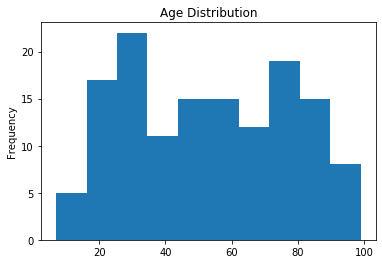

In [4]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

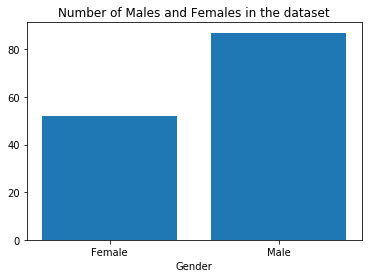

In [5]:
# Number of males and females
F = df[df['sex'] == 0].count()['prognosis']
M = df[df['sex'] == 1].count()['prognosis']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

In [6]:
#split data into test and train data
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 2)
 
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (111, 22), (111,)
Test: (28, 22), (28,)


In [7]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [8]:
# Initialize the models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)
lr = LogisticRegression(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, ab, gb, lr]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

C:\Users\tobun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tobun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tobun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

In [9]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           0       0.21      1.00      0.35         6
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         4

    accuracy                           0.21        28
   macro avg       0.03      0.14      0.05        28
weighted avg       0.05      0.21      0.08        28


confusion_matrix :
[[6 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [5 0 0 0 0 0 0]
 [5 0 0 0 0 0 0]
 [3 0 0 0 0 0 0]
 [4 0 0 0 0 0 0]
 [4 0 0 0 0 0 0]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         1
           2   

In [10]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
input_data = (22,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,1)
#input_data = (22,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,0)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person has common cold')
elif (prediction[0]== 1):
  print('The Person has covid 19 ')
elif (prediction[0]== 2):
  print('The Person has dengue fever')
elif (prediction[0]== 3):
  print('The Person has Dyspepia')
elif (prediction[0]== 4):
  print('The Person has malaria')
elif (prediction[0]== 5):
  print('The Person has Pneumonia')
else:
  print('The Person has Typhoid Fever')

[0]
The Person has common cold
